In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
deli=pd.read_csv("delivery_time.csv")
deli.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [4]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

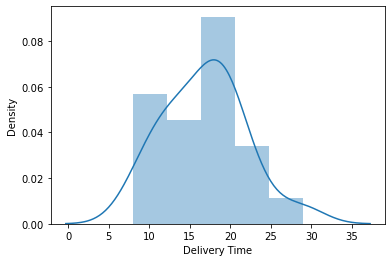

In [5]:
#Visualization
sns.distplot(deli['Delivery Time'])

C:\Users\swami\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

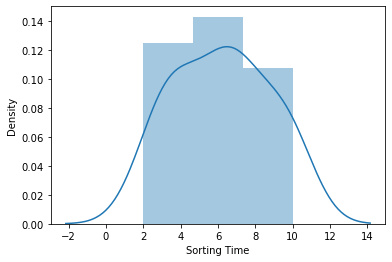

In [5]:
sns.distplot(deli['Sorting Time'])

# Feature Engineering

In [6]:
#Renaming Columns
deli=deli.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
deli

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [7]:
deli.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

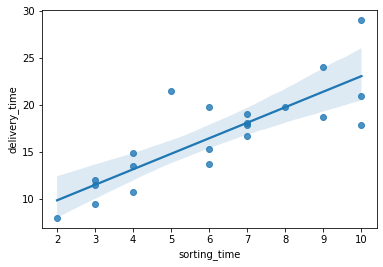

In [8]:
sns.regplot(x=deli['sorting_time'],y=deli['delivery_time'])

# Model Building

In [9]:
# Finding Coefficient parameters
model=smf.ols('delivery_time~sorting_time',data=deli).fit()

# Model Testing

In [10]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [12]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [13]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [14]:
#  Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([2,4,6,8,10])
new_data

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,2
1,4
2,6
3,8
4,10


In [16]:
model.predict(data_pred)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
dtype: float64

# Log transformation

In [17]:
x_log=np.log(deli['sorting_time'])
y_log=np.log(deli['delivery_time'])

In [18]:
model = smf.ols("y_log ~ x_log",data=deli).fit()
model

In [19]:
model.param

AttributeError: 'OLSResults' object has no attribute 'param'

In [20]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64 
 Intercept    13.085552
x_log         8.024484
dtype: float64


In [21]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [22]:
y_log=(1.741987) + (0.597522)*5
y_log

4.729597

In [23]:
newtime=pd.Series([2,4,6,8,10])

In [24]:
pred=pd.DataFrame(newtime,columns=['x_log'])
pred

,x_log
0,2
1,4
2,6
3,8
4,10


In [25]:
model.predict(pred)

0    2.937032
1    4.132076
2    5.327121
3    6.522166
4    7.717210
dtype: float64

In [26]:
deli

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Improving model using squareroot transformation

In [27]:
deli.insert(len(deli.columns),'A_sqart',
           np.sqrt(deli.iloc[:,0]))
deli

,delivery_time,sorting_time,A_sqart
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [33]:
model=smf.ols("delivery_time~A_sqart",data=deli).fit()

In [34]:
model

In [35]:
model.params

Intercept   -15.902667
A_sqart       8.068752
dtype: float64

In [36]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.158463e-15
A_sqart      9.829837e-21
dtype: float64 
 Intercept   -21.550902
A_sqart      44.806348
dtype: float64


In [37]:
(model.rsquared,model.rsquared_adj)

(0.9906247323423885, 0.9901312972025141)

In [39]:
y_quad=(-3.930699)+(3.977225)*5
y_quad

15.955426

In [40]:
newtime=pd.Series([2,4,6,8,10])

In [41]:
pred=pd.DataFrame(newtime,columns=['a_sqrt'])
pred

,a_sqrt
0,2
1,4
2,6
3,8
4,10


# improving model with square transformation

In [42]:
deli['Squar_del_time']=deli.apply(lambda row:row.delivery_time**2,axis=1)
deli

,delivery_time,sorting_time,A_sqart,Squar_del_time
0,21.00,10,4.582576,441.0000
1,13.50,4,3.674235,182.2500
2,19.75,6,4.444097,390.0625
3,24.00,9,4.898979,576.0000
4,29.00,10,5.385165,841.0000
5,15.35,6,3.917908,235.6225
6,19.00,7,4.358899,361.0000
7,9.50,3,3.082207,90.2500
8,17.90,10,4.230839,320.4100
9,18.75,9,4.330127,351.5625


In [43]:
model=smf.ols('Squar_del_time~sorting_time',data=deli).fit()

In [44]:
model

In [45]:
model.params

Intercept      -37.440078
sorting_time    55.553783
dtype: float64

In [46]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.593778
sorting_time    0.000035
dtype: float64 
 Intercept      -0.542504
sorting_time    5.368383
dtype: float64


In [48]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

# improving model with reciprocol transformation

In [50]:
reciprocal_del_time=1/deli["delivery_time"]

In [51]:
model=smf.ols('reciprocal_del_time~sorting_time',data=deli).fit()

In [52]:
model

In [53]:
model.params

Intercept       0.110682
sorting_time   -0.007287
dtype: float64

In [54]:
print(model.pvalues,'\n',model.tvalues)

Intercept       9.669983e-12
sorting_time    4.059187e-06
dtype: float64 
 Intercept       14.525932
sorting_time    -6.378315
dtype: float64


In [55]:
(model.rsquared,model.rsquared_adj)

(0.6816508639250471, 0.6648956462368918)

# improving model using Box-cox transformation

In [56]:
from scipy.stats import boxcox
bcx_target, lam=boxcox(deli["delivery_time"])

In [57]:
model=smf.ols('bcx_target~sorting_time',data=deli).fit()

In [58]:
model.params

Intercept       3.714122
sorting_time    0.468564
dtype: float64

In [59]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.790789e-07
sorting_time    2.093830e-06
dtype: float64 
 Intercept       7.964349
sorting_time    6.700806
dtype: float64


In [60]:
(model.rsquared,model.rsquared_adj)

(0.7026641437912345, 0.6870148882012995)

# improving model using Yeo-Johnson Transformation

In [61]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(deli["delivery_time"])

In [62]:
model=smf.ols('yf_target~sorting_time',data=deli).fit()

In [63]:
model.params

Intercept       3.967570
sorting_time    0.424596
dtype: float64

In [64]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.440405e-08
sorting_time    2.095432e-06
dtype: float64 
 Intercept       9.388311
sorting_time    6.700429
dtype: float64


In [65]:
(model.rsquared,model.rsquared_adj)

(0.7026406506507266, 0.6869901585797122)